<h1 align="center"> Neural Network Two Layers Classifier </h1>

<div align="center"> Author: 22110980014 Xu Shi</div>

Homepage: https://github.com/Shixu-max/Numpy-neural-network-two-layers-classifier

Model in Baidu Netdisk: https://pan.baidu.com/s/1hzkMCHe8OqT3ZuXBRyiuug

where Baidu Netdisk's fetch code: t5jp

MNIST: https://academictorrents.com/details/323a0048d87ca79b68f12a6350a57776b6a3b7fb


## Contents

- [Train](#train)
- [Parameter Seek](#parameter-seek)
- [Validation](#validation)
- [Visualization](#visualization)

# Train

In [2]:
import numpy as np
from twolayerclassifier import Classifier
from matplotlib import pyplot as plt
import pickle
import gzip

def load_data(path):
    f = gzip.open(path, 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)
    
# dataset path
# training_data  : (50000 * 784, 50000)
# validation_data: (10000 * 784, 10000)
# test_data      : (10000 * 784, 10000)
path = 'mnist.pkl.gz'
training_data , validation_data , test_data = load_data(path)
data_x = training_data[0]
data_y = np.eye(10)[training_data[1]] #Onehot encoding
valid_x = validation_data[0]
valid_y = np.eye(10)[validation_data[1]]

### Change Activation Function

In [3]:
# neural network from twolayerclassifier
np.random.seed(2023)
nn = Classifier([784,900,10],['relu','sigmoid'], lr = 0.03125)

### Change Loss Function

In [160]:
# train model
result = nn.trmodel(data_x, data_y, epochs = 10, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)

100%|██████████| 1250/1250 [00:18<00:00, 67.46it/s]


### Save Model

In [161]:
# save your model here
nn.save(r'trained model.txt')

### Plot

dict_keys(['loss', 'acc', 'loss_valid'])
Validation Accuracy = [0.9705, 0.9742, 0.9768, 0.9778, 0.978, 0.9799, 0.9819, 0.9827, 0.9812, 0.9834]


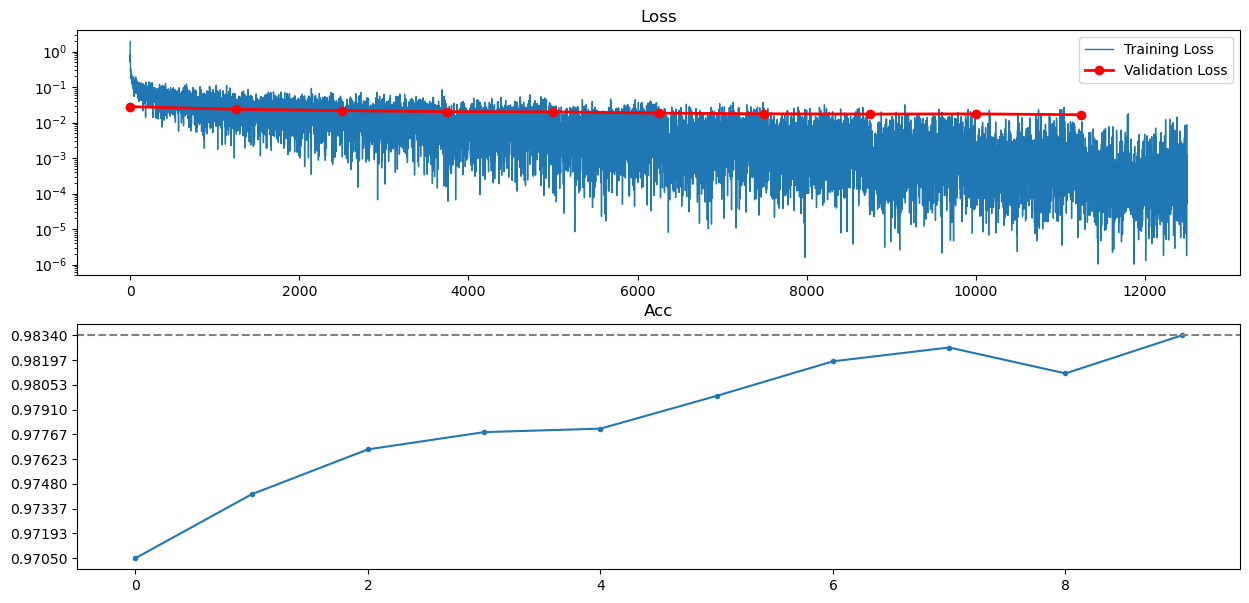

In [162]:
from figureplot import figureplot
print(result.keys())
figureplot(result, True)

# Parameter Seek

Seek the best paramters: learn rate, hidden sizes,and regularization strengeth.

To shorten the waiting time, here I have used reduced parameters for display. In practice, one could set larger epochs and use larger search range.

### Learn Rate

In [103]:
from IPython.display import clear_output
from time import sleep
lrs = [1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128]
epochs = 10
accuracies = []
best = 0
best_acc = 0
for lr in lrs:
    print(f'Training learning rate = {lr}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Classifier([784,500,10],['relu','sigmoid'], lr = lr)
    result2 = nn.trmodel(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = lr
    clear_output(wait = True)

print('All acc =', accuracies)
print('Best Lr =', best, '\nBest Acc =', best_acc)

All acc = [0.0991, 0.0991, 0.0991, 0.9729, 0.9813, 0.9815, 0.9815, 0.9787]
Best Lr = 0.03125 
Best Acc = 0.9815


### Hidden Layer Size

In [127]:
from IPython.display import clear_output
from time import sleep
hidden_sizes = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
epochs = 10
accuracies = []
best = 0
best_acc = 0
for hidden_size in hidden_sizes:
    print(f'Training hidden size = {hidden_size}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Classifier([784,hidden_size,10],['relu','sigmoid'], lr = 0.03125)
    result2 = nn.trmodel(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = hidden_size
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Size =', best, '\nBest Acc =', best_acc)

Training hidden size = 100


  7%|▋         | 85/1250 [00:00<00:01, 906.68it/s]


KeyboardInterrupt: 

### Regularization Strength

In [112]:
from IPython.display import clear_output
from time import sleep
regs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0]
epochs = 10
accuracies = []
best = 0
best_acc = 0
for reg in regs:
    print(f'Training regularization = {reg}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Classifier([784,900,10],['relu','sigmoid'], lr = 0.03125, regws=[reg,reg])
    result2 = nn.trmodel(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = reg
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Reg =', best, '\nBest Acc =', best_acc)

All acc = [0.9834]
Best Reg = 0 
Best Acc = 0.9834
1


# Validation

Validate our model on the training data, validation data and the testing data.

In [147]:
# load your model
nn = Classifier.load(r'trained model.txt')

In [148]:
from time import sleep 
print('-'*30 + '\nAccuracy on Training Data')
sleep(0.25)
nn.predict(data_x, data_y)
print('-'*30 + '\nAccuracy on Validation Data')
sleep(0.25)
nn.predict(validation_data[0], np.eye(10)[validation_data[1]])
print('-'*30 + '\nAccuracy on Testing Data')
sleep(0.25)
nn.predict(test_data[0], np.eye(10)[test_data[1]])
print(end = '')

------------------------------
Accuracy on Training Data


100%|██████████| 1250/1250 [00:00<00:00, 1517.66it/s]


Acc = 49998/50000 = 99.996%
------------------------------
Accuracy on Validation Data


100%|██████████| 250/250 [00:00<00:00, 1440.37it/s]


Acc = 9834/10000 = 98.34%
------------------------------
Accuracy on Testing Data


100%|██████████| 250/250 [00:00<00:00, 1416.21it/s]

Acc = 9838/10000 = 98.38%


Let's check the cases that our model fails to classify.

In [21]:
def extract_failure(nn, x, y):
    pred = nn.predict(x)
    failure = np.where(y != pred)
    return failure[0], pred[failure[0]], y[failure[0]]

nn = Classifier.load(r'mymodel.txt')
used_data = test_data  # try out training_data / validation_data / test_data
failure = extract_failure(nn, used_data[0], used_data[1])
print(failure[0]) # failed indices

100%|██████████| 250/250 [00:00<00:00, 4397.63it/s]

[   8  119  247  321  340  381  445  449  495  582  583  619  684  720
  740  900  938  951  956  965 1003 1014 1039 1044 1112 1156 1182 1224
 1226 1232 1242 1247 1260 1299 1319 1378 1393 1500 1530 1549 1609 1671
 1681 1901 1940 1941 1984 2035 2040 2044 2053 2098 2109 2118 2130 2135
 2182 2185 2291 2369 2387 2454 2488 2597 2607 2648 2654 2743 2863 2877
 2921 2939 2953 3005 3073 3422 3503 3520 3549 3558 3597 3681 3718 3780
 3796 3808 3869 3906 3926 3941 3943 3985 4065 4075 4078 4163 4176 4199
 4224 4248 4289 4360 4443 4497 4536 4601 4740 4807 4823 4879 4880 5331
 5457 5642 5676 5734 5749 5936 5937 5955 5972 5973 6023 6045 6166 6555
 6571 6574 6597 6625 6641 6651 6783 7216 8094 8246 8277 8293 8325 8408
 8527 9009 9015 9024 9280 9587 9634 9664 9729 9742 9745 9749 9770 9777
 9808 9839 9944 9982]


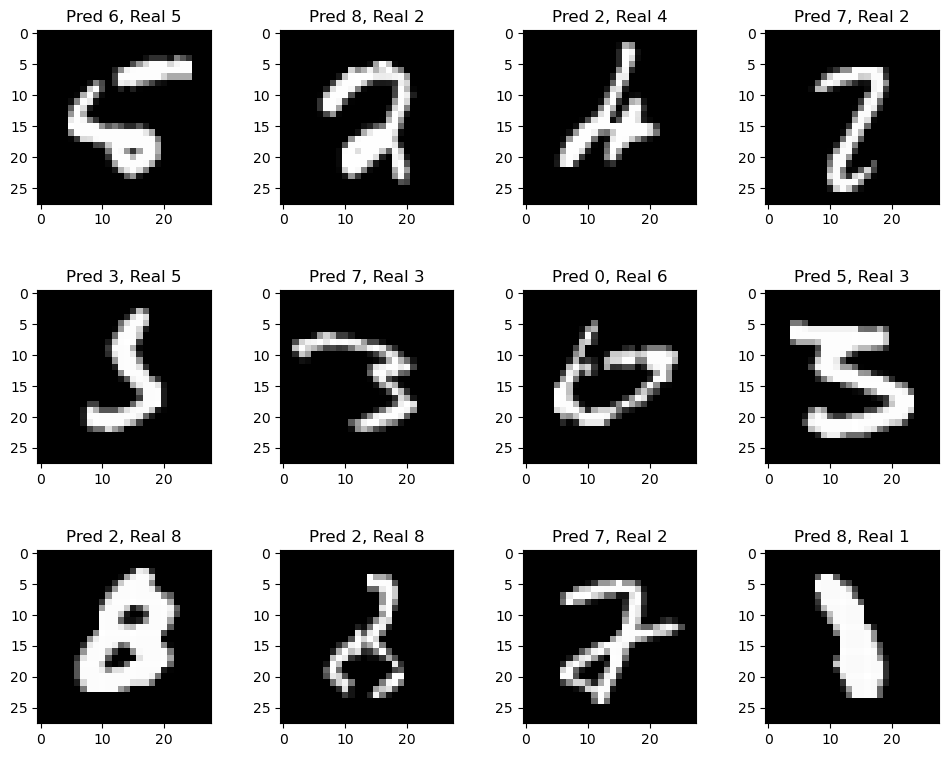

In [124]:
# a visualization of the failed cases
plt.figure(figsize=(12,9))
n = min(failure[0].size, 4)
m , n = min(failure[0].size // n, 3), n
for i in range(m):
    for j in range(n):
        k = i*n+j
        plt.subplot(m,n,k+1)
        plt.imshow(used_data[0][failure[0][k]].reshape((28,28)), cmap='gray')
        plt.title(f'Pred {failure[1][k]}, Real {failure[2][k]}')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Visualization

Compare the visualized weights of network with 0, 1, and 20 training epochs.

In [23]:
# control group without training
np.random.seed(2023)
nn0 = Classifier([784,500,10],['relu','sigmoid'], lr = 3e-2)

# control group with only 1 epoch
np.random.seed(2023)
nn1 = Classifier([784,500,10],['relu','sigmoid'], lr = 3e-2)
result1 = nn1.model(data_x, data_y, epochs = 1, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)
print(result1['acc'])

100%|██████████| 1250/1250 [00:05<00:00, 214.74it/s]


[0.9621]


In [24]:
# load your model
nn = Classifier.load(r'trained model.txt')

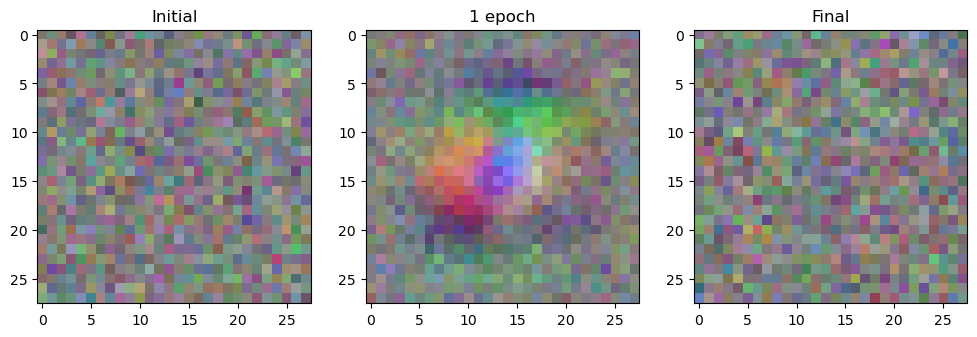

In [25]:
from sklearn.decomposition import PCA 

def nnPCA(nn, affine = False):
    '''Visualize the first layer of a network by PCA'''
    center_x = nn.weights[0].copy()# - np.mean(nn.weights[0])
    pca = PCA(n_components=3)
    PCA_X = pca.fit_transform(center_x)
    if affine:
        minimum, maximum = np.min(PCA_X), np.max(PCA_X)
        PCA_X = (PCA_X - minimum) * (1. / (maximum - minimum))
    else:
        PCA_X = np.clip(PCA_X, -1., 1.) * .5 + .5
    
    # to 28*28*3 RGB
    return PCA_X.reshape((28,28,3))
    

plt.figure(figsize = (12,9))
names = ['Initial','1 epoch','Final']
for i , network in enumerate([nn0, nn1, nn]):
    plt.subplot(1, 3, i+1)
    plt.imshow(nnPCA(network, affine = False))
    plt.title(names[i])
plt.show()